In [2]:
import torch 

import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline 

> In this we will see how BCE cost function helps in calculating loss 


$$
BCE = (-1) (1/m) \sum_{m=0}^{M} (y_{i} * log(h(x{i}, \theta))+ (1-y_{i}) (1-log(h(x{i}, \theta))
$$


### 1st term 

$$
(y_{i} * log(h(x{i}, \theta))
$$

where  $y_{i}$ is label, $x_{i}$ is input and  $h(x{i}, \theta)$ is model output so we finally have `label * log(model output)`

label | model output | loss | desc |
-----  | ------- | ----| -- |
1 | 1 | 0 | label is 1 and model output is also 1 and hence loss is 1 
1 | 0.001 | -inf | since label is 1 and model output is zero, we have loss as -inf |
0 | 0.999 | 0 | loss is zero as label is also zero 

This means that if we predict a label as not a label , then we have high loss. 


### 2nd term

where  (1-$y_{i}$ )is label, $x_{i}$ is input and  (1-$h(x{i}, \theta)$) is model output so we finally have `(1-label) * (1-log(model output))`


label | model output | loss | desc |
-----  | ------- | ----| -- |
1 | 1 | 0 | label is 1 and model output is also 1 and hence loss is 1 
1 | 0.001 | 0 | since label is 1 and model output is zero, we have loss as 0 |
0 | 0.999 | -inf | loss is maximum |

So this means that when negative is predicted postive, we have high loss. 

In total we have
- first term penalizing if the pos label is predicted as negative 
- 2nd term penalizing if the neg label is predicted as positive. 

In [ ]:
x = torch.ones(100)
y = torch.arange(0, 100)/100
loss = x * y.log()
loss

tensor([   -inf, -4.6052, -3.9120, -3.5066, -3.2189, -2.9957, -2.8134, -2.6593,
        -2.5257, -2.4079, -2.3026, -2.2073, -2.1203, -2.0402, -1.9661, -1.8971,
        -1.8326, -1.7720, -1.7148, -1.6607, -1.6094, -1.5606, -1.5141, -1.4697,
        -1.4271, -1.3863, -1.3471, -1.3093, -1.2730, -1.2379, -1.2040, -1.1712,
        -1.1394, -1.1087, -1.0788, -1.0498, -1.0217, -0.9943, -0.9676, -0.9416,
        -0.9163, -0.8916, -0.8675, -0.8440, -0.8210, -0.7985, -0.7765, -0.7550,
        -0.7340, -0.7133, -0.6931, -0.6733, -0.6539, -0.6349, -0.6162, -0.5978,
        -0.5798, -0.5621, -0.5447, -0.5276, -0.5108, -0.4943, -0.4780, -0.4620,
        -0.4463, -0.4308, -0.4155, -0.4005, -0.3857, -0.3711, -0.3567, -0.3425,
        -0.3285, -0.3147, -0.3011, -0.2877, -0.2744, -0.2614, -0.2485, -0.2357,
        -0.2231, -0.2107, -0.1985, -0.1863, -0.1744, -0.1625, -0.1508, -0.1393,
        -0.1278, -0.1165, -0.1054, -0.0943, -0.0834, -0.0726, -0.0619, -0.0513,
        -0.0408, -0.0305, -0.0202, -0.01

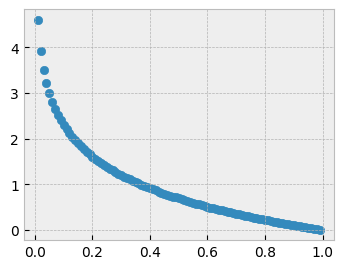

In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(y.numpy(), -1*loss.numpy()) # we added -1 because loss needs to be positive
plt.show()

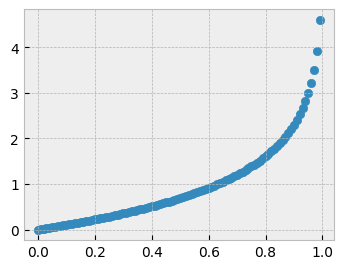

In [ ]:
x = torch.zeros(100)
y = torch.arange(0, 100)/100
loss = (1-x) * (1-y).log()
plt.figure(figsize=(4, 3))
plt.scatter(y.numpy(), -1*loss.numpy()) # we added -1 because loss needs to be positive
plt.show()

## Earth mover distance 

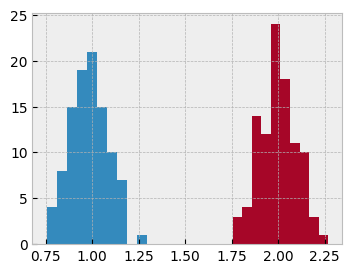

In [10]:
p = torch.normal(1, 0.1, size=(100, 1))
q = torch.normal(2, 0.1, size=(100, 1))
plt.figure(figsize=(4, 3))
plt.hist(p.numpy().reshape(-1))
plt.hist(q.numpy().reshape(-1))
plt.show()